# Ford GoBike System Data Exploration July 2018 to June 2019
### by Yuski X

### Table of Contents
- Introduction
- Part I - Gathering Data
- Part II - Assessing Data
- Part III - Cleaning Data
- Part IV - Univariate Exploration
- Part V - Bivariate Exploration
- Part VI - Multivariate Exploration


### Introduction
> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system has over 2600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. Bay Wheels become the first regional and large-scale bicycle sharing system deployed in California. As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.[1]

### Preliminary Wrangling

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The bikes can be unlocked from one station and returned to any other stations in the system, making them ideal for one-way trips. Users can either pay for the annual membership or pay for per ride. The source data can be downloaded at: https://www.lyft.com/bikes/bay-wheels/system-data.

> Each trip is anonymized and includes:
- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude

> This project will focus on an entire year from July 2018 to June 2019. Joining miltiple data into a gaint table may be necessary.

### Part I - Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import glob
import os

%matplotlib inline

> Load in your dataset

> path to the folder where all files has been stored:
> path =r'...\Online Course\Data Analyst\HW5\Dataset

> store list of all file locations:
> all_files = glob.glob(os.path.join(path, "*.csv"))

> load and union the dataset:
> df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

> write newly loaded data:
> df.to_csv('all_in_one.csv', index=False)

#### Path to the folder where all files has been stored:

In [2]:
#change the path to the dataset where you cached
path = r'...\Online Course\Data Analyst\HW5\Dataset'

#### Store list of all file locations:

In [3]:
all_files = glob.glob(os.path.join(path, "*.csv"))

#### Combine dataset:

In [4]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

C:\Users\Yue Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
C:\Users\Yue Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
df.to_csv('all_in_one.csv', index=False)

### Part II - Assessing Data

#### Load dataset

In [6]:
df = pd.read_csv('all_in_one.csv')

C:\Users\Yue Xu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1953,No,59989,181.0,37.811377,-122.265192,Grand Ave at Webster St,2018-08-01 11:00:22.1890,1995.0,Male,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-07-31 18:20:32.7230,Customer
1,3010,No,60232,356.0,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-01 10:08:18.7520,1994.0,Female,NaN,77.0,37.773507,-122.416040,11th St at Natoma St,2018-07-31 17:24:26.2350,Subscriber
2,4273,No,43864,NaN,37.410000,-121.940000,NaN,2018-08-01 09:14:30.8340,1998.0,Male,NaN,NaN,37.410000,-121.940000,NaN,2018-07-31 21:03:26.7030,Subscriber
3,1043,No,51522,345.0,37.766474,-122.398295,Hubbell St at 16th St,2018-08-01 09:13:06.6610,1990.0,Female,NaN,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-07-31 18:54:23.7210,Subscriber
4,1336,No,83380,198.0,37.807813,-122.264496,Snow Park,2018-08-01 08:32:09.2700,1982.0,Male,NaN,213.0,37.823847,-122.281193,32nd St at Adeline St,2018-07-31 09:22:29.1000,Subscriber


In [8]:
df.shape

(2289396, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289396 entries, 0 to 2289395
Data columns (total 17 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(8)
memory usage: 296.9+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,2.289396e+06,2.289396e+06,2.276679e+06,2.289396e+06,2.289396e+06,2.168862e+06,2.276781e+06,2.289396e+06,2.289396e+06
mean,3.764574e+03,8.121749e+02,1.313338e+02,3.776756e+01,-1.223488e+02,1.984306e+03,1.328476e+02,3.776771e+01,-1.223501e+02
std,1.994234e+04,2.039258e+03,1.104570e+02,1.490161e-01,3.700837e-01,1.021027e+01,1.104699e+02,1.078740e-01,1.610139e-01
min,1.100000e+01,6.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,1.515000e+03,3.480000e+02,3.700000e+01,3.777041e+01,-1.224113e+02,1.980000e+03,4.200000e+01,3.777041e+01,-1.224117e+02
50%,2.918000e+03,5.540000e+02,9.300000e+01,3.778107e+01,-1.223971e+02,1.987000e+03,9.600000e+01,3.778095e+01,-1.223974e+02
75%,4.544000e+03,8.660000e+02,2.100000e+02,3.779728e+01,-1.222894e+02,1.992000e+03,2.130000e+02,3.779728e+01,-1.222880e+02
max,9.851100e+05,8.628100e+04,4.430000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.430000e+02,4.551000e+01,0.000000e+00


#### Quality issues

1. Datatype: start_time and end_time are objects
2. Datatype: user_type, member_gender and bike_share_for_all_trip should be category
3. Datatype: bike_id, start_station_id, end_station_id should be object
4. member_birth_year has data prior to 1900. Also an age column can be added to the dataset.
5. Popular time slots during the day, week, month, year can be analyzed.
6. Each ride duration also can be calculated.

### Part III - Cleaning Data

In [12]:
df_new = df.copy()

##### 1,2,3 Datatype

In [13]:
df_new.start_time = pd.to_datetime(df_new.start_time)
df_new.end_time = pd.to_datetime(df_new.end_time)

In [14]:
df_new.user_type = df_new.user_type.astype('category')
df_new.member_gender = df_new.member_gender.astype('category')
df_new.bike_share_for_all_trip = df_new.bike_share_for_all_trip.astype('category')

In [15]:
df_new.bike_id = df_new.bike_id.astype(str)
df_new.start_station_id = df_new.bike_id.astype(str)
df_new.end_station_id = df_new.bike_id.astype(str)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289396 entries, 0 to 2289395
Data columns (total 17 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 251.1+ MB


##### 4. member_birth_year has data prior to 1900. Also an age column can be added to the dataset.

In [17]:
df_new['member_age'] = 2019-df_new['member_birth_year']

In [18]:
df_new.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,1953,No,59989,1953,37.811377,-122.265192,Grand Ave at Webster St,2018-08-01 11:00:22.189,1995.0,Male,NaN,1953,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-07-31 18:20:32.723,Customer,24.0
1,3010,No,60232,3010,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-01 10:08:18.752,1994.0,Female,NaN,3010,37.773507,-122.416040,11th St at Natoma St,2018-07-31 17:24:26.235,Subscriber,25.0
2,4273,No,43864,4273,37.410000,-121.940000,NaN,2018-08-01 09:14:30.834,1998.0,Male,NaN,4273,37.410000,-121.940000,NaN,2018-07-31 21:03:26.703,Subscriber,21.0
3,1043,No,51522,1043,37.766474,-122.398295,Hubbell St at 16th St,2018-08-01 09:13:06.661,1990.0,Female,NaN,1043,37.764478,-122.402570,Rhode Island St at 17th St,2018-07-31 18:54:23.721,Subscriber,29.0
4,1336,No,83380,1336,37.807813,-122.264496,Snow Park,2018-08-01 08:32:09.270,1982.0,Male,NaN,1336,37.823847,-122.281193,32nd St at Adeline St,2018-07-31 09:22:29.100,Subscriber,37.0


In [19]:
df_new.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age
count,2.289396e+06,2.289396e+06,2.289396e+06,2.168862e+06,2.289396e+06,2.289396e+06,2.168862e+06
mean,8.121749e+02,3.776756e+01,-1.223488e+02,1.984306e+03,3.776771e+01,-1.223501e+02,3.469415e+01
std,2.039258e+03,1.490161e-01,3.700837e-01,1.021027e+01,1.078740e-01,1.610139e-01,1.021027e+01
min,6.000000e+01,0.000000e+00,-1.224737e+02,1.878000e+03,0.000000e+00,-1.224737e+02,1.800000e+01
25%,3.480000e+02,3.777041e+01,-1.224113e+02,1.980000e+03,3.777041e+01,-1.224117e+02,2.700000e+01
50%,5.540000e+02,3.778107e+01,-1.223971e+02,1.987000e+03,3.778095e+01,-1.223974e+02,3.200000e+01
75%,8.660000e+02,3.779728e+01,-1.222894e+02,1.992000e+03,3.779728e+01,-1.222880e+02,3.900000e+01
max,8.628100e+04,4.551000e+01,0.000000e+00,2.001000e+03,4.551000e+01,0.000000e+00,1.410000e+02


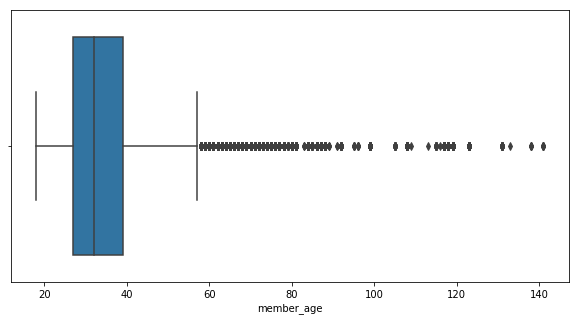

In [20]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data=df_new, x='member_age', color=base_color);

In [21]:
df_new.member_age.describe(percentiles = [ .95])

count    2.168862e+06
mean     3.469415e+01
std      1.021027e+01
min      1.800000e+01
50%      3.200000e+01
95%      5.500000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [22]:
df_new.member_age.describe(percentiles = [ .99])

count    2.168862e+06
mean     3.469415e+01
std      1.021027e+01
min      1.800000e+01
50%      3.200000e+01
99%      6.400000e+01
max      1.410000e+02
Name: member_age, dtype: float64

> Since 95% of users are below 55 years old, 99% are below 64 years old. I am going to keep user below 65 years old and remove age outliers (for example, those was born before 1900.

In [23]:
df_new = df_new.query('member_age <=65')

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151147 entries, 0 to 2289393
Data columns (total 18 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 float64
dtypes: category(3), datetime64[ns](2), float64(6), int64(1), object(6)
memory usage: 268.7+ MB


In [25]:
df_new.member_age = df_new.member_age.astype(int)
df_new.member_birth_year = df_new.member_birth_year.astype(int)

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151147 entries, 0 to 2289393
Data columns (total 18 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          int32
member_gender              category
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
dtypes: category(3), datetime64[ns](2), float64(4), int32(2), int64(1), object(6)
memory usage: 252.3+ MB


In [27]:
df_new.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age
count,2.151147e+06,2.151147e+06,2.151147e+06,2.151147e+06,2.151147e+06,2.151147e+06,2.151147e+06
mean,7.656534e+02,3.776707e+01,-1.223476e+02,1.984627e+03,3.776725e+01,-1.223490e+02,3.437260e+01
std,1.804866e+03,1.521599e-01,3.794342e-01,9.548768e+00,1.091097e-01,1.606231e-01,9.548768e+00
min,6.000000e+01,0.000000e+00,-1.224737e+02,1.954000e+03,0.000000e+00,-1.224737e+02,1.800000e+01
25%,3.430000e+02,3.777041e+01,-1.224108e+02,1.980000e+03,3.777041e+01,-1.224117e+02,2.700000e+01
50%,5.450000e+02,3.778101e+01,-1.223971e+02,1.987000e+03,3.778095e+01,-1.223974e+02,3.200000e+01
75%,8.460000e+02,3.779728e+01,-1.222880e+02,1.992000e+03,3.779728e+01,-1.222852e+02,3.900000e+01
max,8.628100e+04,4.551000e+01,0.000000e+00,2.001000e+03,4.551000e+01,0.000000e+00,6.500000e+01


In [40]:
df_new.shape

(2151147, 23)

##### 5. Popular time slots during the day, week, month, year can be added to the dataset and analyzed later.

In [28]:
df_new['start_time_month']=df_new['start_time'].dt.strftime('%B')

In [29]:
df_new['start_time_day']=df_new['start_time'].dt.day.astype(int)

In [30]:
df_new['start_time_weekday']=df_new['start_time'].dt.strftime('%a')

In [31]:
df_new['start_time_hour']=df_new['start_time'].dt.hour

In [32]:
df_new.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month,start_time_day,start_time_weekday,start_time_hour
0,1953,No,59989,1953,37.811377,-122.265192,Grand Ave at Webster St,2018-08-01 11:00:22.189,1995,Male,...,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-07-31 18:20:32.723,Customer,24,July,31,Tue,18
1,3010,No,60232,3010,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-01 10:08:18.752,1994,Female,...,37.773507,-122.416040,11th St at Natoma St,2018-07-31 17:24:26.235,Subscriber,25,July,31,Tue,17
2,4273,No,43864,4273,37.410000,-121.940000,NaN,2018-08-01 09:14:30.834,1998,Male,...,37.410000,-121.940000,NaN,2018-07-31 21:03:26.703,Subscriber,21,July,31,Tue,21
3,1043,No,51522,1043,37.766474,-122.398295,Hubbell St at 16th St,2018-08-01 09:13:06.661,1990,Female,...,37.764478,-122.402570,Rhode Island St at 17th St,2018-07-31 18:54:23.721,Subscriber,29,July,31,Tue,18
4,1336,No,83380,1336,37.807813,-122.264496,Snow Park,2018-08-01 08:32:09.270,1982,Male,...,37.823847,-122.281193,32nd St at Adeline St,2018-07-31 09:22:29.100,Subscriber,37,July,31,Tue,9


In [33]:
df_new.to_csv('all_in_one.csv', index=False)

#### What is the structure of your dataset?

There are about 2,289,396 bike rides that happen in July 2018 to June 2019 calendar year in the San Francisco Bay Area. The dataset contained features about:

ride duration: start/end time, how long does each ride take;
stations: start/end station, name, geolocation (latitude/longitude), how far between each station (distance);
customer data: gender, birth year and user type;
bikes info: bike id.

In addition, I added serverl columns to the dataset that might be useful for analyzed in the future, including:

rental time: month, day, hour of the day, weekday (both for start and end date)
customer data: age

#### What is/are the main feature(s) of interest in your dataset?

I am interested in results like what is the most popular time slots during the day, week, month and year for the bike rental services, majority customers are members or just one-time user, as well as which gender and ages are using the services the most, so that they can be the targeted customers for the market.


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the bike rental time, customer related data will help me to do the analysis. I also think geolocation info will explain the bike demand.

### Part IV - Univariate Exploration

In this section, I will focus on popularity of bike rentals during the days, weeks and months, as well as the each ride's duration.

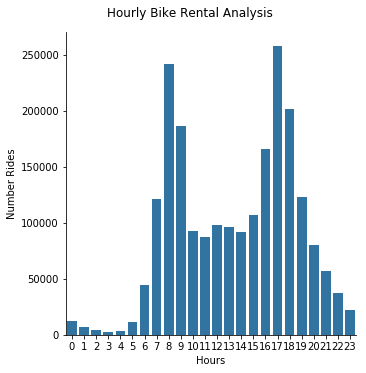

In [34]:
hour_ride = sb.catplot(data=df_new, x='start_time_hour', kind='count', color = base_color)
hour_ride.set_axis_labels("Hours", "Number Rides")
hour_ride.fig.suptitle('Hourly Bike Rental Analysis', y=1.03, fontsize=12);

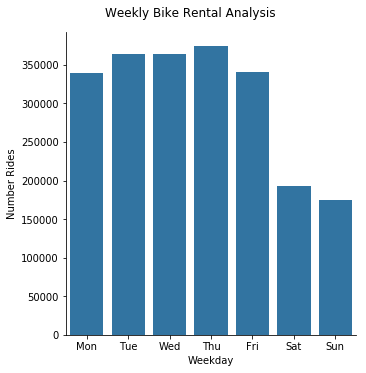

In [35]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_ride = sb.catplot(data=df_new, x='start_time_weekday', kind='count', color = base_color, order = weekday)
week_ride.set_axis_labels("Weekday", "Number Rides")
week_ride.fig.suptitle('Weekly Bike Rental Analysis', y=1.03, fontsize=12);

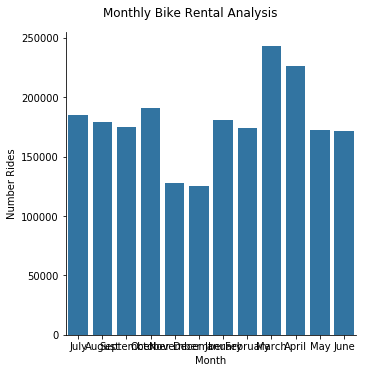

In [36]:
month_ride = sb.catplot(data=df_new, x='start_time_month', kind='count', color = base_color)
month_ride.set_axis_labels("Month", "Number Rides")
month_ride.fig.suptitle('Monthly Bike Rental Analysis', y=1.03, fontsize=12);

The above plt has overlap in x-axis. I decided to use number (month) instead of name (month).

In [37]:
df_new['start_time_month_num']=df_new['start_time'].dt.month.astype(int)

In [38]:
df_new.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month,start_time_day,start_time_weekday,start_time_hour,start_time_month_num
0,1953,No,59989,1953,37.811377,-122.265192,Grand Ave at Webster St,2018-08-01 11:00:22.189,1995,Male,...,-122.24968,El Embarcadero at Grand Ave,2018-07-31 18:20:32.723,Customer,24,July,31,Tue,18,7


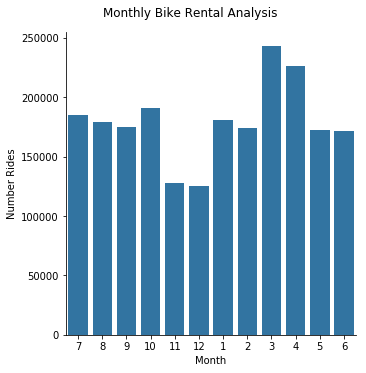

In [39]:
mon = [7,8,9,10,11,12,1,2,3,4,5,6]
month_ride = sb.catplot(data=df_new, x='start_time_month_num', kind='count', color = base_color, order=mon)
month_ride.set_axis_labels("Month", "Number Rides")
month_ride.fig.suptitle('Monthly Bike Rental Analysis', y=1.03, fontsize=12);

##### Results show:
1. The hourly distribution is bimodal, 8-9am and 5-6pm are the two most popular time slots for bike rental. This is equalivent to weekday commute busy hours (people usualy go to work/school at 8-9am, and finish work at 5-6pm).

2. The bike rental services are mainly used during weekdays, Thursday is the most popular days for bike rentals. This can be explained by majority people are using this service for a daily work or school reason.

3. In general Winter time (Nov-Feb) are the worst for the bike rental services. This is probably due to the winter weather conditions. The bike rental sevices are the most popular during early spring (March and April) and summer (July to Oct). March and April are the peak season, probably is due to the nice weather in Spring as well as Spring breaks for students.

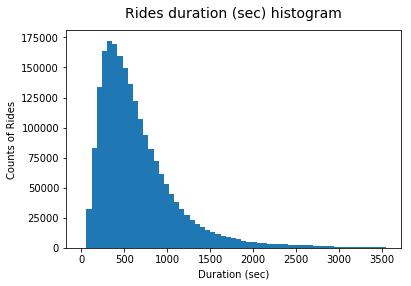

In [41]:
bin_edges = np.arange(0, 3600,60)

data_hist=plt.hist(x = df_new['duration_sec'], bins = bin_edges)

plt.title("Rides duration (sec) histogram", y=1.03, fontsize=14)
plt.xlabel('Duration (sec)')
plt.ylabel('Counts of Rides');

In [42]:
data_hist

(array([     0.,  32113.,  82679., 133680., 163318., 172252., 169208.,
        159861., 149709., 136240., 122262., 107155.,  94142.,  82117.,
         71796.,  61427.,  52816.,  44916.,  38432.,  32566.,  27487.,
         23227.,  20026.,  16910.,  14764.,  12855.,  11455.,  10123.,
          9236.,   8060.,   6986.,   5848.,   5049.,   4515.,   4036.,
          3805.,   3440.,   3226.,   2976.,   2837.,   2587.,   2359.,
          2310.,   2151.,   1946.,   1586.,   1328.,   1207.,   1140.,
          1052.,    993.,    934.,    869.,    824.,    774.,    756.,
           717.,    690.,    661.]),
 array([   0,   60,  120,  180,  240,  300,  360,  420,  480,  540,  600,
         660,  720,  780,  840,  900,  960, 1020, 1080, 1140, 1200, 1260,
        1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920,
        1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580,
        2640, 2700, 2760, 2820, 2880, 2940, 3000, 3060, 3120, 3180, 3240,
        3300, 3360, 3420,

##### Results show:
Since there is only a small dataset are above 3600s for bike rental duration, therefore I cut off the time at 3600s (1hr) for this analysis. Based on the histogram, we can see that majority ride rental duration are no longer than 1800s (30mins), with few data are between 1800s and 2700s (45mins) and most rides last 300-600s (5-10 mins). This can be explained by three factors:

1. Each 2 dollor single ride lasts no longer than 30 mins. If your ride lasts longer than 30 minutes, it’s an extra 3 dollor per additional 15 minutes.

2. The membership allows each ride no longer than 45 mins. If you keep a bike out longer than 45 minutes at a time, it’s an extra 3 dollar per additional 15 minutes.

3. Majority people use this service are very short period of time, this is becasue they are using it for commute (ex.from home/work to train/bus stations).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are trip last for 86281s (almost 24hrs). Therefore, I cut off those outliers, and set the datapoint at 3600s (1hr), which makes more sense.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are people born before 1900. Since 99% of poeple are below 64 years old, and majority people are between 18 and 55 years old, therefore, I cut off those age above 65 years old.

### Part V - Bivariate Exploration

In [43]:
customer = df_new.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_new.query('user_type == "Subscriber"')['bike_id'].count()

customer_perc = customer / df_new['bike_id'].count()
subscriber_perc = subscriber / df_new['bike_id'].count()

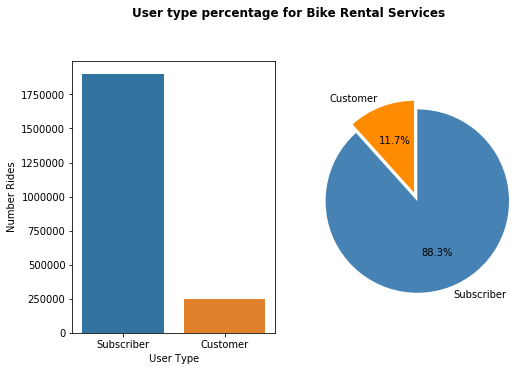

In [44]:
# bar chart
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_new, x="user_type", order=df_new.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number Rides')

# pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_perc, subscriber_perc]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.suptitle('User type percentage for Bike Rental Services', y=1.03, fontsize=12, fontweight='semibold');

##### Results show:
Majority (88.3%) of bike rental customers are subscribers, only 11.7% customers are one-time users.

##### Each type of users' bike rentals analysis will be performed as below:

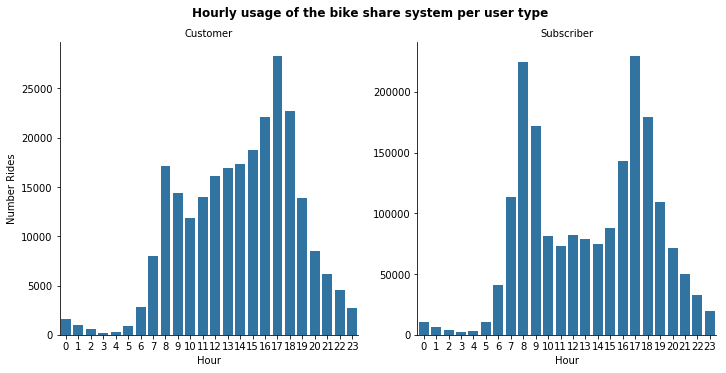

In [45]:
bike_hour = sb.catplot(data=df_new, x='start_time_hour', col="user_type", kind='count', sharey = False, color = base_color)
bike_hour.set_axis_labels("Hour", "Number Rides")
bike_hour.set_titles("{col_name}")
bike_hour.fig.suptitle('Hourly Bike Rental Analysis per user type', y=1.03, fontsize=12, fontweight='semibold');

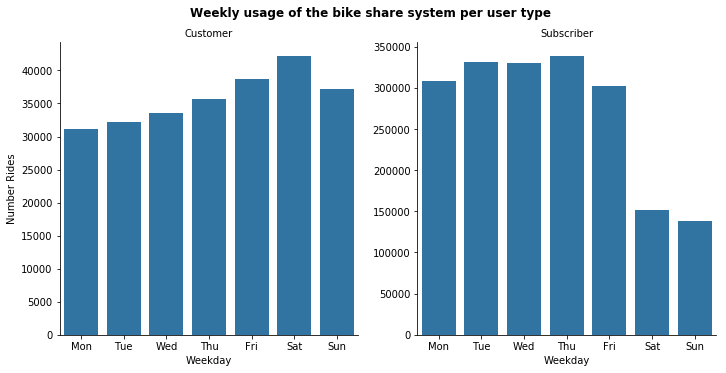

In [46]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
bike_week = sb.catplot(data=df_new, x='start_time_weekday', col="user_type", kind='count', sharey = False, color = base_color, order = weekday)
bike_week.set_axis_labels("Weekday", "Number Rides")
bike_week.set_titles("{col_name}")
bike_week.fig.suptitle('Weekly Bike Rental Analysis per user type', y=1.03, fontsize=12, fontweight='semibold');

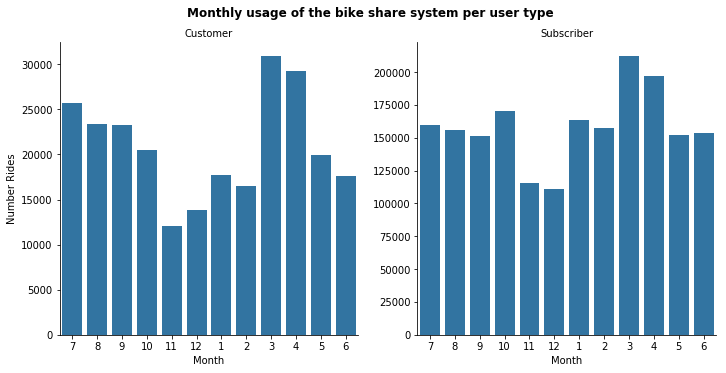

In [48]:
mon_order=[7,8,9,10,11,12,1,2,3,4,5,6]
bike_month = sb.catplot(data=df_new, x='start_time_month_num', col="user_type", kind='count', sharey = False, color = base_color, order = mon_order)
bike_month.set_axis_labels("Month", "Number Rides")
bike_month.set_titles("{col_name}")
bike_month.fig.suptitle('Monthly Bike Rental Analysis per user type', y=1.03, fontsize=12, fontweight='semibold');

##### Results show:
1. This is a little bit different from the Univariate Exploration session. Customers (single-time users) bike rental time is evenly distributed during the day time (8am-7pm) with peak hour at 5pm. On the other hand, subscribers use bike during busy hour (8-9am, 5-6pm) for daily work/school commute, which make sense to me.

2. This is also a little bit different from the Univariate Exploration session as well. Customers (single-time users) are mostly tourists who usually use bike during weekends (Fri-Sun). However, opposite to customers, subscribers are usually local residents who use bike consistantly for daily work/school commute during weekdays (Mon-Fri).

3. Similar to the results in Univariate Exploration session, winter time (Nov-Dec) are the worst for the bike rental services for both group due to the cold weather in winter. For Customers, the most popular rental period is Mar-Apr, following by Summer time July-Oct. This is probably due to a lot travellers are visting Bay Area during that time, For Subscribers, the most popular time is between Mar-Apr, and the rest of the months are pretty consistant in demand. The reason for that is those seasons has a better weather compared to winter for daily bike commute.

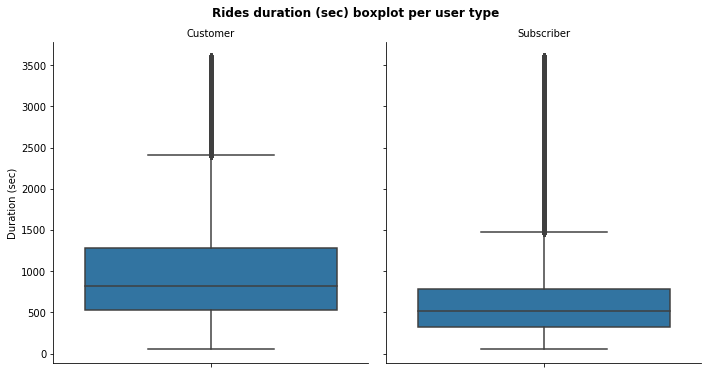

In [49]:
bike_t = df_new.query('duration_sec < 3600')
bike_dur = sb.catplot(data=bike_t, y='duration_sec', col="user_type", kind='box',color = base_color)
bike_dur.set_titles(col_template = '{col_name}')
bike_dur.set_axis_labels("", "Duration (sec)")
bike_dur.fig.suptitle('Rides duration (sec) boxplot per user type', y=1.03, fontsize=12, fontweight='semibold');

##### Results show:
Based on the boxplot, we can see that customers (one-time users) have a longer bike rental period (540-1380s = 9-23mins) compared to subscribers (420-780s =7-13mins) This is consistant with all previous results that customers are majority travellers for tour purpose, and subcribers are using it for daily work/school commute.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> By adding 2nd variable, the results provide more insights than the Univariate results. In summary, customers are typically tourists, and peak traval season is usally during the early spring (March-Apri), following by summer season (July-Oct). They rent bike usually during the weekends and more often within the day rather than around busy/commute hours as subscribers did. Subscribers are usually local residents, who rent bike more often during the weekday commute hours. In addition, early Spring to Fall  are bike rental peak seasons due to the weather is a lot nicer compare to winter time (Nov-Dec).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers usually have a little bit longer bike rental time compare to subscribers. This can be explained by the fact that tourist usually rent the bike for tour purposes, and subscribers mainly use it for commute purpose (from home/office/school to bus/train stations)

### Part VI - Multivariate Exploration

In [63]:
df_new.member_gender.value_counts()

Male      1587137
Female     526807
Other       37203
Name: member_gender, dtype: int64

In [64]:
df_new['member_gender'] =df_new['member_gender'].map({'Male':'Male', 'Female':'Female',
                           'M': 'Male', 'F': 'Female', 'O':'Other', 'Other':'Other'})
df_new.member_gender.value_counts()

Male      1587137
Female     526807
Other       37203
Name: member_gender, dtype: int64

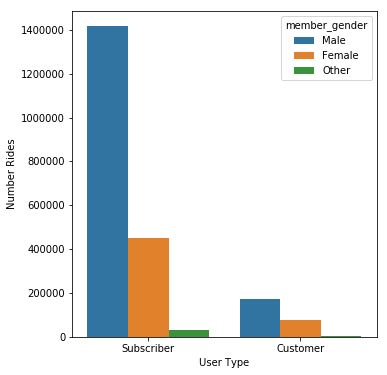

In [65]:
plt.figure(figsize = [12, 6])

# bar chart
plt.subplot(1, 2, 1)

ride_gen = sb.countplot(data=df_new, x="user_type", hue="member_gender", order=df_new.user_type.value_counts().index)
ride_gen.set_xlabel('User Type')
ride_gen.set_ylabel('Number Rides');

##### Results show:
In both type of customers, male users are more than females and others. In subscribers, male are about 3.5x females. In customers, males are double.

#### Each type and gender of users' bike rentals analysis will be performed as below:

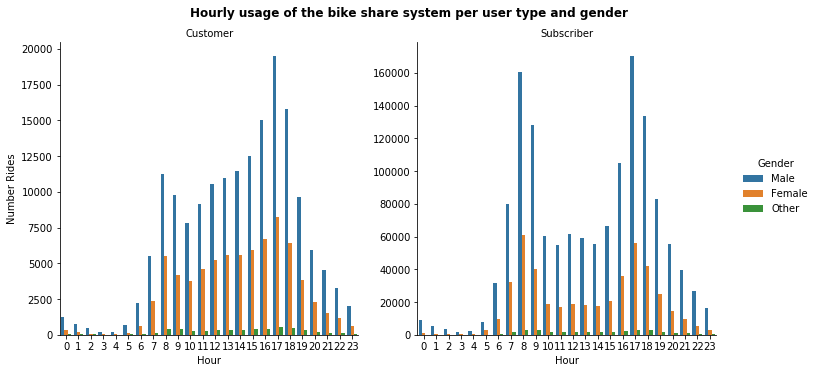

In [55]:
gen_hour = sb.catplot(data=df_new, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
gen_hour.set_axis_labels("Hour", "Number Rides")
gen_hour._legend.set_title('Gender')
gen_hour.set_titles("{col_name}")
gen_hour.fig.suptitle('Hourly Bike Rental Analysis per user type and gender', y=1.03, fontsize=12, fontweight='semibold');

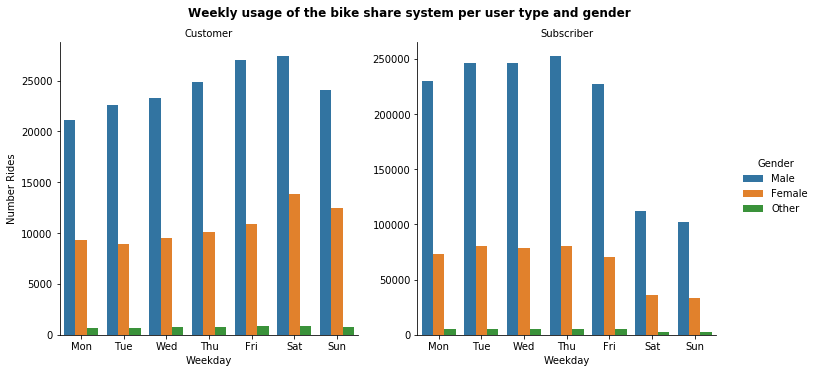

In [56]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
gen_week = sb.catplot(data=df_new, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False, order = weekday)
gen_week.set_axis_labels("Weekday", "Number Rides")
gen_week._legend.set_title('Gender')
gen_week.set_titles("{col_name}")
gen_week.fig.suptitle('Weekly Bike Rental Analysis per user type and gender', y=1.03, fontsize=12, fontweight='semibold');

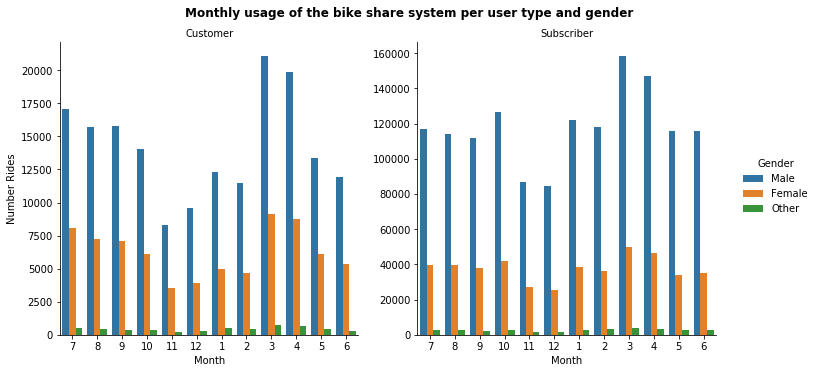

In [58]:
mon_order=[7,8,9,10,11,12,1,2,3,4,5,6]
gen_month = sb.catplot(data=df_new, x='start_time_month_num', col="user_type", hue="member_gender", kind='count', sharey = False, order = mon_order)
gen_month.set_axis_labels("Month", "Number Rides")
gen_month._legend.set_title('Gender')
gen_month.set_titles("{col_name}")
gen_month.fig.suptitle('Monthly Bike Rental Analysis per user type and gender', y=1.03, fontsize=12, fontweight='semibold');

##### Results show:
1. Similar to the Bivariate Exploration results, customers bike rental time is evenly distributed during the day time (8am-7pm) with peak hour at 5pm. Subscribers use bike during busy hour (8-9am, 5-6pm) for daily work/school commute. Both results regardless of genders.

2. Similar to previous results, customer are mostly use bike during weekends (Fri-Sun), and subscribers are usually local residents who use bike for daily work/school commute during weekdays (Mon-Fri).

3. Again, similar to previous results, early spring following by summer time are the most popular season for customers bike rental, reaching its peak in Mar-Apr. For the rest of the year (except Nov-Dec), subscribers use bike in a consistance demand (reach highest demand in Mar-Apr) due to the nice weather in general compared to winter time. 

4. All of them have a similar trends, regardless of gender, except for subscribers, amount of female riders are very consistant through the entire year.

In [116]:
mem_gen = df_new.query('member_gender == "Male" or member_gender == "Female" or member_gender == "Other"')

In [117]:
mem_gen

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month,start_time_day,start_time_weekday,start_time_hour,start_time_month_num
0,1953,No,59989,1953,37.811377,-122.265192,Grand Ave at Webster St,2018-08-01 11:00:22.189,1995,Male,...,-122.249680,El Embarcadero at Grand Ave,2018-07-31 18:20:32.723,Customer,24,July,31,Tue,18,7
1,3010,No,60232,3010,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-01 10:08:18.752,1994,Female,...,-122.416040,11th St at Natoma St,2018-07-31 17:24:26.235,Subscriber,25,July,31,Tue,17,7
2,4273,No,43864,4273,37.410000,-121.940000,NaN,2018-08-01 09:14:30.834,1998,Male,...,-121.940000,NaN,2018-07-31 21:03:26.703,Subscriber,21,July,31,Tue,21,7
3,1043,No,51522,1043,37.766474,-122.398295,Hubbell St at 16th St,2018-08-01 09:13:06.661,1990,Female,...,-122.402570,Rhode Island St at 17th St,2018-07-31 18:54:23.721,Subscriber,29,July,31,Tue,18,7
4,1336,No,83380,1336,37.807813,-122.264496,Snow Park,2018-08-01 08:32:09.270,1982,Male,...,-122.281193,32nd St at Adeline St,2018-07-31 09:22:29.100,Subscriber,37,July,31,Tue,9,7
5,697,No,49546,697,37.769188,-122.422285,Valencia St at Clinton Park,2018-08-01 08:29:57.838,1991,Female,...,-122.411901,Garfield Square (25th St at Harrison St),2018-07-31 18:44:11.573,Customer,28,July,31,Tue,18,7
6,605,No,42799,605,37.808894,-122.256460,Grand Ave at Perkins St,2018-08-01 07:23:04.527,1976,Female,...,-122.266588,Webster St at 19th St,2018-07-31 19:29:44.649,Subscriber,43,July,31,Tue,19,7
7,800,No,50603,800,37.794130,-122.394430,Steuart St at Market St,2018-08-01 07:22:47.694,1972,Male,...,-122.403452,Post St at Kearny St,2018-07-31 17:19:23.983,Subscriber,47,July,31,Tue,17,7
8,2432,No,54830,2432,37.862464,-122.264791,Parker St at Fulton St,2018-08-01 06:58:01.958,1997,Male,...,-122.265896,Fulton St at Bancroft Way,2018-07-31 15:44:11.925,Subscriber,22,July,31,Tue,15,7
9,3839,No,22051,3839,37.794130,-122.394430,Steuart St at Market St,2018-08-01 04:26:51.159,1978,Male,...,-122.402923,Commercial St at Montgomery St,2018-07-31 22:19:19.422,Subscriber,41,July,31,Tue,22,7


In [122]:
bike_ti = df_new.query('duration_sec < 3600')

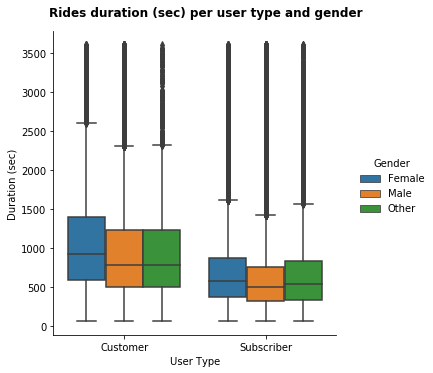

In [125]:
gen_dur = sb.catplot(data=bike_ti, x='user_type', y="duration_sec", hue="member_gender", kind="box")

gen_dur.set_axis_labels("User Type", "Duration (sec)")
gen_dur._legend.set_title('Gender')
gen_dur.fig.suptitle('Rides duration (sec) per user type and gender', y=1.03, fontsize=12, fontweight='semibold');

##### Results show:
Based on the boxplots, we can see that females ususaly have a longer bike rental period compare to males and others, especially in customer, females usually ride 900s (15mins), and males/other ride 750s (~13mins). 

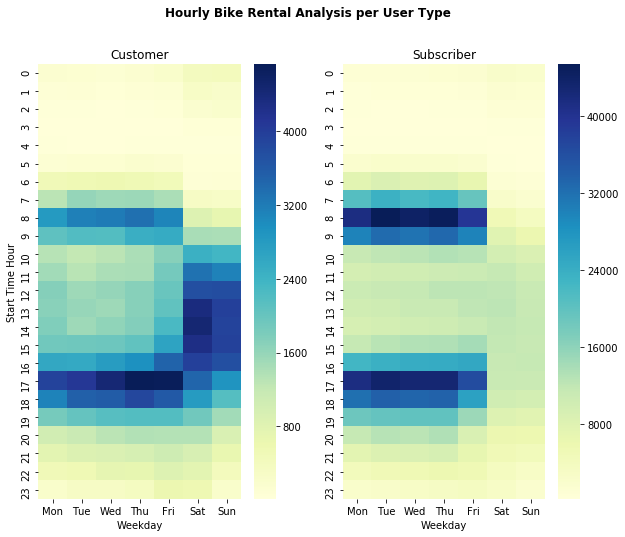

In [91]:
df_new['start_time_weekday'] = pd.Categorical(df_new['start_time_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
plt.figure(figsize=(10,8))
plt.suptitle('Hourly Bike Rental Analysis per User Type', fontsize=12, fontweight='semibold')

# heatmap (customers)
plt.subplot(1, 2, 1)
df_customer = df_new.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap (subscribers)
plt.subplot(1, 2, 2)
df_subscriber = df_new.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

##### Results show:
The heatmap demonstrates that two groups have different renting behaviors: Left one is for tour purpose, the right one is for commute, respectively.

> Customers use bike rental services more often during weekends.
- Weekdays: Most popular time slots for bike rental is happened at 8-9am and 5-6pm, with the peak at 5pm on Friday. Most bike rides happen around 8-9am and 5-6pm with the peak on Thursday and Fridays around 5pm. In addition, besides those peak hours, the bike rentals is pretty balanced during the day from 7am-7pm, and there are more users using the bike in the early afternoon compared to subscribers. 
- Weekends: Most popular time slots for bike rental is happened between 9am to 7pm, with the peak at 2pm on Saturday. Also  Saturday starting from 11am to 5pm, bikes are always on high demand.

> Subscribers use bike rental services more often during weekdays.
- Weekdays: Most popular time slots for bike rental is happend at 8-9am and 5-6pm everyday on the weekday, it is very consistant. The peak happened at 8am on Tuesdays.
- Weekends: There are not much users renting bikes during the entire days on the weekends compared to customers. The drop is significant.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Heatmap helps me quickly figure out the bike rental patterns. It demonstrates that bikes are always high in demand at 8-9am and 5-6pm are not percertly true. Different user types have different behaviors. Subscribers are the one use bike the most at weekday commute hours (8-9am,5-6pm). Customers use bike majority during weekends with the peak on Saturday around 2pm. These insights are not visible in the univariate explorations.

### Were there any interesting or surprising interactions between features?

> There are not much of the differences in trends compared to previous Bivariate Exploration results. However, one observation is that the amount of female riders are very consistant through the entire year for subscribers. In addition, females in general spent more time on each ride compare to males/others.

### References
[1] Bay Wheels Wikipedia: https://en.wikipedia.org/wiki/Bay_Wheels